In [4]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# import seaborn as sns

In [5]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
%sql sqlite:////home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rawDataInstallInappEventsPur.db

In [ ]:
# somatorio de cada MEDIA SOURCE

In [14]:
# %sql
mediaSource_total = %sql SELECT count(MediaSource) as qde, MediaSource FROM concat_hu_non_org_inapp_events GROUP by MediaSource ORDER by qde DESC;
df_MS_total = mediaSource_total.DataFrame()

 * sqlite:////home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rawDataInstallInappEventsPur.db
Done.


In [16]:
df_MS_total.head(10)

,qde,MediaSource
0,2963,googleadwords_int
1,1204,bannerfullhomesitem
2,287,rodapesitem
3,90,E-mail Confirmação de Compra
4,71,MenuLateralSiteM
5,63,Email
6,37,E-mail
7,34,Whatsapp Newsletter
8,18,Site
9,15,Zendesk


#### tabela rodapesitem

In [10]:
result_rodapesite_m = %sql SELECT *, CAST(julianday(EventTime) - julianday(InstallTime) AS INT) as diff_days FROM concat_hu_non_org_inapp_events WHERE MediaSource = 'rodapesitem' ORDER BY diff_days;
df_rodape = result_rodapesite_m.DataFrame()

 * sqlite:////home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rawDataInstallInappEventsPur.db
Done.


In [11]:
df_rodape.head()

,AttributedTouchType,AttributedTouchTime,InstallTime,EventTime,EventValue,EventRevenue,MediaSource,Campaign,Region,State,City,AdvertisingID,IsRetargeting,IsPrimaryAttribution,diff_days
0,click,2020-05-28 18:06:47,2020-05-28 18:08:37,2020-05-28 18:15:05,"{""af_currency"":""BRL"",""af_revenue"":1198,""af_pri...",1198.00,rodapesitem,None,SA,RJ,Rio De Janeiro,49f48fd5-d792-4d36-b461-9f7707da187e,0,1,0
1,click,2020-05-28 15:22:48,2020-05-28 15:24:48,2020-05-28 15:51:20,"{""af_currency"":""USD"",""af_revenue"":90.64,""af_pr...",90.64,rodapesitem,None,None,AZ,Phoenix,2622a6ef-bda6-49c0-b37d-136719d72411,0,1,0
2,click,2020-05-26 15:53:17,2020-05-26 15:53:54,2020-05-26 15:59:39,"{""af_currency"":""USD"",""af_revenue"":122.22,""af_p...",122.22,rodapesitem,None,None,FL,Kissimmee,e2a5612c-6603-401d-993a-67c09b9dad4c,0,1,0
3,click,2020-05-25 21:37:13,2020-05-25 21:41:35,2020-05-26 12:12:03,"{""af_price"":168.13,""af_content_id"":""OMN-1859"",...",168.13,rodapesitem,None,SA,RS,Novo Hamburgo,70918141-25a4-4c0c-9437-5e36f9ef6f7a,0,1,0
4,click,2020-05-24 14:48:42,2020-05-24 14:50:33,2020-05-24 14:55:25,"{""af_currency"":""BRL"",""af_revenue"":3118,""af_pri...",3118.00,rodapesitem,None,SA,SP,Sao Jose Dos Campos,25a26312-e438-4fb3-9cbc-57309a9705fd,0,1,0


In [12]:
# df_rodape.to_csv(
#     '/home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rodapefullsitem.csv',
#     index=False)

#### tabela banner

In [10]:
result_banner = %sql SELECT *, CAST(julianday(EventTime) - julianday(InstallTime) AS INT) as diff_days FROM concat_hu_non_org_inapp_events WHERE MediaSource = 'bannerfullhomesitem' ORDER BY diff_days;
df_banner = result_banner.DataFrame()

 * sqlite:////home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rawDataInstallInappEventsPur.db
Done.


In [11]:
# df_banner.head()

,AttributedTouchType,AttributedTouchTime,InstallTime,EventTime,EventValue,EventRevenue,MediaSource,Campaign,Region,State,City,AdvertisingID,IsRetargeting,IsPrimaryAttribution,diff_days
0,click,2020-05-31 16:30:33,2020-05-31 16:37:36,2020-05-31 16:52:29,"{""af_price"":1239,""af_content_id"":""LGPKG-872787...",1239.00,bannerfullhomesitem,None,SA,PI,Teresina,f3f941a5-31ce-4096-9b3a-14ff679e9214,0,1,0
1,click,2020-05-31 10:29:40,2020-05-31 10:31:24,2020-05-31 11:44:01,"{""af_currency"":""BRL"",""af_revenue"":128.8,""af_pr...",128.80,bannerfullhomesitem,None,SA,RJ,Rio De Janeiro,b9720f01-a9d3-4034-8b5a-bbf0b2ad3db0,0,1,0
2,click,2020-05-30 23:14:18,2020-05-30 23:20:58,2020-05-30 23:36:29,"{""af_currency"":""BRL"",""af_revenue"":789.52,""af_p...",789.52,bannerfullhomesitem,None,SA,AP,Pracuuba,4c29825f-ebdb-4a32-bc67-75b38d0a6d10,0,1,0
3,click,2020-05-30 20:58:13,2020-05-30 20:58:45,2020-05-30 21:49:43,"{""af_currency"":""BRL"",""af_revenue"":699,""af_pric...",699.00,bannerfullhomesitem,None,SA,MS,Campo Grande,4a6b0825-7f97-45b3-a919-b062fdf7d8ec,0,1,0
4,click,2020-05-30 20:58:13,2020-05-30 20:58:45,2020-05-30 21:36:51,"{""af_currency"":""BRL"",""af_revenue"":1398,""af_pri...",1398.00,bannerfullhomesitem,None,SA,MS,Campo Grande,4a6b0825-7f97-45b3-a919-b062fdf7d8ec,0,1,0


In [13]:
# df_banner.to_csv(
#     '/home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/bannerfullhomesitem.csv',
#     index=False)

### tabela googleads

In [8]:
# result = %sql SELECT * FROM concat_hu_non_org_inapp_events WHERE IsPrimaryAttribution = '1' and MediaSource = 'googleadwords_int';
# df_no_ret_googleads = result.DataFrame()

 * sqlite:////home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rawDataInstallInappEventsPur.db
Done.


In [5]:
result1 = %sql SELECT * FROM concat_hu_non_org_inapp_events WHERE IsPrimaryAttribution = '0' and MediaSource = 'googleadwords_int';
df_yes_ret_googleads = result1.DataFrame()

 * sqlite:////home/selaranjeira/Desktop/hurb_python/rawDataInstallInappEventsPur/dados/rawDataInstallInappEventsPur.db
Done.


## Testando

In [7]:
# df_no_ret_googleads['EventTime'] = pd.to_datetime(df_no_ret_googleads['EventTime'])
# df_no_ret_googleads.sort_values(by=['EventTime'], inplace=True, ascending=True)

In [9]:
# df_yes_ret_googleads['EventTime'] = pd.to_datetime(df_yes_ret_googleads['EventTime'])
# df_yes_ret_googleads.sort_values(by=['EventTime'], inplace=True, ascending=True)

In [11]:
# sns.scatterplot(x='EventTime', y='EventRevenue', data=df_yes_ret_googleads)
# plt.show()

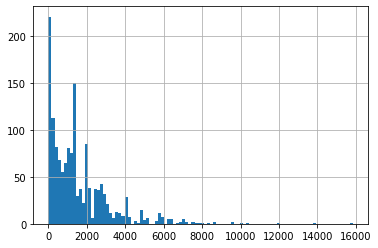

In [12]:
# df_yes_ret_googleads['EventRevenue'].hist(bins=100, grid=True)

Text(0, 0.5, 'Frequency')

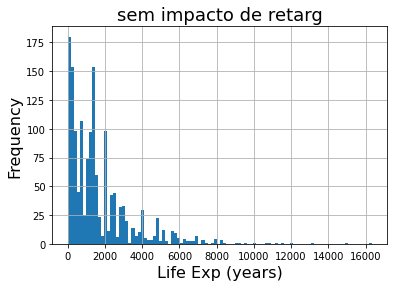

In [13]:
# df_no_ret_googleads['EventRevenue'].hist(bins=100, grid=True)
# plt.title('sem impacto de retarg', fontsize=18)
# plt.xlabel('Life Exp (years)', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

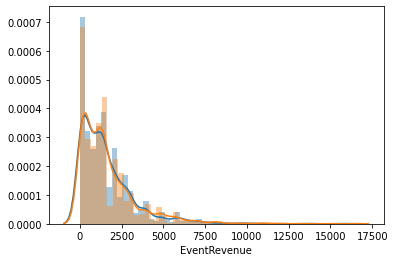

In [14]:
# sns.distplot(df_yes_ret_googleads['EventRevenue'])
# sns.distplot(df_no_ret_googleads['EventRevenue'])

Text(0, 0.5, 'rev')

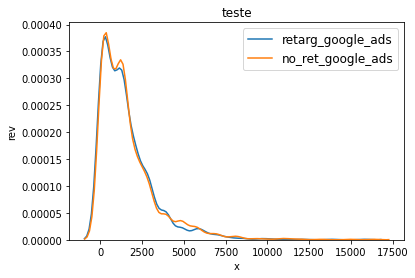

In [15]:
# #df = df_yes_ret_googleads[df_yes_ret_googleads.EventRevenue == 'retarg_google_ads']
# sns.distplot(df_yes_ret_googleads['EventRevenue'], hist = False, kde = True, label='retarg_google_ads')
# #df = df_no_ret_googleads[df_no_ret_googleads.EventRevenue == 'no_ret_google_ads']
# sns.distplot(df_no_ret_googleads['EventRevenue'], hist = False, kde = True, label='no_ret_google_ads')
# # Plot formatting
# plt.legend(prop={'size': 12})
# plt.title('teste')
# plt.xlabel('x')
# plt.ylabel('rev')  

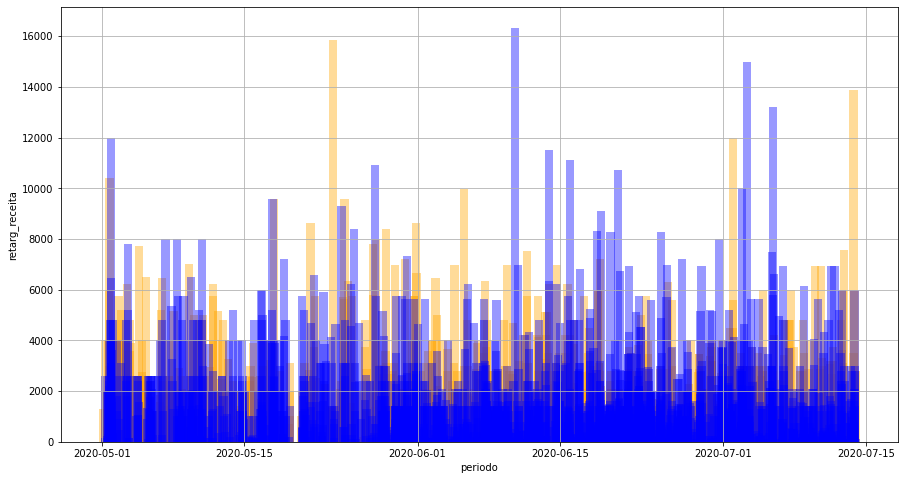

In [16]:
# # plot
# fig, ax = plt.subplots(figsize=(8, 4))
# plt.bar(df_yes_ret_googleads['EventTime'], df_yes_ret_googleads['EventRevenue'], color = 'orange', alpha = 0.4)
# plt.bar(df_no_ret_googleads['EventTime'], df_no_ret_googleads['EventRevenue'], color = 'b', alpha = 0.4)
# # ticklabels = ['']*len(df_yes_ret_googleads)
# # skip = len(df_yes_ret_googleads)//12
# # ticklabels[::skip] = df_yes_ret_googleads['EventTime'].iloc[::skip].dt.strftime('%Y-%m-%d')
# # ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
# # fig.autofmt_xdate()
# # fig.suptitle('evolu_rec_retarg')
# plt.xlabel('periodo')
# plt.ylabel('retarg_receita')
# plt.grid()

In [25]:
# df_yes_ret_googleads.set_index('EventTime')['EventRevenue'].plot(kind='bar', figsize=(19, 10), color='cadetblue', rot=45)
# plt.show()

# plt.title("Historical Count of Passengers Per Month", y=1.013, fontsize=22)
# plt.ylabel("Count [Passengers]", labelpad=16)
# plt.xlabel("Date [Month - Year]", labelpad=16)

# sns.jointplot(x="EventTime", y="EventRevenue", data=df_yes_ret_googleads)

In [26]:
# df_yes_ret_googleads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 455 to 1176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AttributedTouchType   1468 non-null   object        
 1   AttributedTouchTime   1468 non-null   object        
 2   InstallTime           1468 non-null   object        
 3   EventTime             1468 non-null   datetime64[ns]
 4   EventValue            1468 non-null   object        
 5   EventRevenue          1468 non-null   float64       
 6   MediaSource           1468 non-null   object        
 7   Campaign              1468 non-null   object        
 8   Region                1466 non-null   object        
 9   State                 1468 non-null   object        
 10  City                  1468 non-null   object        
 11  AdvertisingID         1468 non-null   object        
 12  IsRetargeting         1468 non-null   int64         
 13  IsPrimaryAttribu